In [1]:
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import os
import re

from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

from keras.applications.vgg16 import VGG16 
from keras.models import Model

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pickle
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [2]:
path = '/Users/shoheisuzuki/workspace/euclidean-eukalyptus/work/music-recommendation/Spectogram_Images/'
# change the working directory to the path where the images are located
os.chdir(path)

songs = []
# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the flowers list
            songs.append(file.name)

In [4]:
with open(r'/Users/shoheisuzuki/workspace/euclidean-eukalyptus/work/music-recommendation/model/audio_features.pkl', 'rb') as file:
    data = pickle.load(file)

In [5]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feature = np.array(list(data.values()))
feature.shape
# (210, 1, 4096)

# reshape so that there are 210 samples of 4096 vectors
feature = feature.reshape(-1,4096)
feature.shape

# # get the unique labels (from the flower_labels.csv)
# df = pd.read_csv('flower_labels.csv')
# label = df['label'].tolist()
# unique_labels = list(set(label))

(4834, 4096)

In [6]:
feature

array([[0.        , 0.27688515, 0.        , ..., 1.9151807 , 0.        ,
        0.        ],
       [0.        , 2.6396756 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 2.4752893 , 0.        , ..., 0.97800446, 0.        ,
        0.        ],
       ...,
       [0.        , 2.3806176 , 0.        , ..., 1.444176  , 0.        ,
        0.        ],
       [0.        , 2.6879911 , 0.        , ..., 2.1829455 , 0.        ,
        0.        ],
       [0.        , 2.410195  , 0.7575766 , ..., 0.54020345, 0.        ,
        0.        ]], dtype=float32)

In [7]:
df = pd.DataFrame(data=feature)
df

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.0,0.276885,0.000000,0.525118,1.358259,0.0,5.603625,0.0,0.0,0.0,...,4.632590,0.0,0.000000,0.000000,2.574090,5.254221,0.0,1.915181,0.0,0.0
1,0.0,2.639676,0.000000,1.443202,1.828559,0.0,5.724163,0.0,0.0,0.0,...,4.982517,0.0,0.000000,0.223240,3.025865,4.277346,0.0,0.000000,0.0,0.0
2,0.0,2.475289,0.000000,1.703385,1.551151,0.0,4.414777,0.0,0.0,0.0,...,4.316081,0.0,0.000000,0.689943,3.871218,4.733443,0.0,0.978004,0.0,0.0
3,0.0,1.155072,0.000000,0.213467,2.855101,0.0,5.501060,0.0,0.0,0.0,...,5.347623,0.0,0.000000,0.847612,4.460057,5.816047,0.0,1.786599,0.0,0.0
4,0.0,1.419908,0.000000,0.596359,0.921858,0.0,6.341099,0.0,0.0,0.0,...,4.390624,0.0,0.000000,0.000000,3.033546,6.367900,0.0,0.749969,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4829,0.0,1.134456,0.000000,1.257037,1.926351,0.0,6.060061,0.0,0.0,0.0,...,3.980004,0.0,0.000000,0.593295,3.709148,6.243112,0.0,1.915098,0.0,0.0
4830,0.0,0.763911,0.000000,0.350312,2.407132,0.0,5.330967,0.0,0.0,0.0,...,4.757872,0.0,0.000000,0.071882,3.476911,5.220980,0.0,1.952804,0.0,0.0
4831,0.0,2.380618,0.000000,1.237662,0.482639,0.0,7.054648,0.0,0.0,0.0,...,4.733780,0.0,0.000000,1.614663,4.179696,7.504448,0.0,1.444176,0.0,0.0
4832,0.0,2.687991,0.000000,1.338039,0.954078,0.0,4.751172,0.0,0.0,0.0,...,5.132657,0.0,0.000000,0.000000,2.285458,3.959879,0.0,2.182945,0.0,0.0


In [8]:
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [9]:
cov_matrix = np.cov(df, rowvar=False)

In [10]:
# sns.heatmap(cov_matrix, cmap=sns.color_palette("vlag", as_cmap=True), annot=True)

In [11]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [12]:
sorted_index = np.argsort(eigenvalues)[::-1]

In [13]:
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:,sorted_index]

In [14]:
sorted_eigenvalues

array([ 3.24296043e+02,  2.00791454e+02,  1.63453403e+02, ...,
       -1.20829556e-14, -1.83988348e-14, -2.33848754e-14])

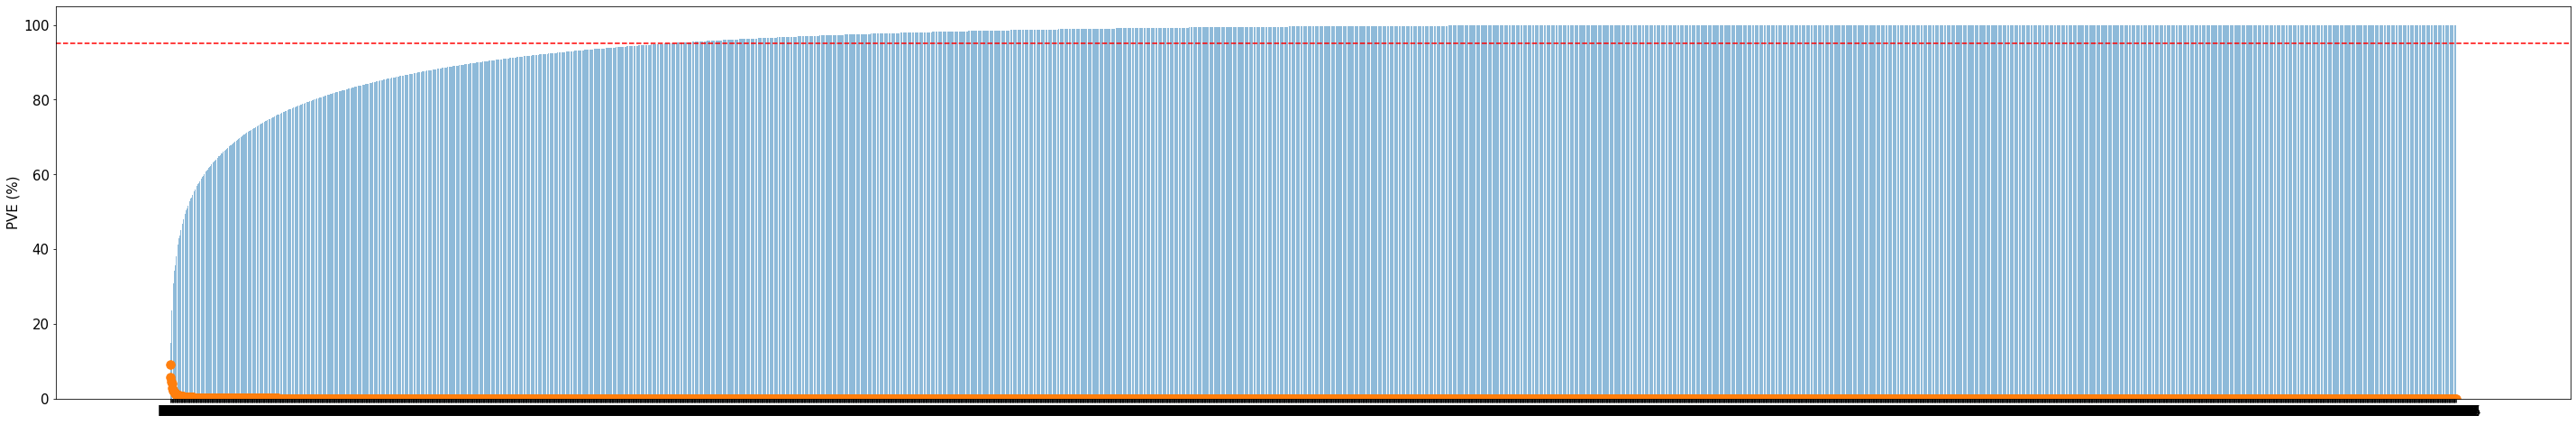

In [15]:
plt.rcParams['figure.figsize'] = (50,8)
plt.bar(range(4096), [sorted_eigenvalues[0:i+1].sum()/np.sum(sorted_eigenvalues) * 100 for i, _ in enumerate(sorted_eigenvalues)], alpha=0.5)
plt.scatter(range(4096), sorted_eigenvalues/np.sum(sorted_eigenvalues)*100, s=90)
plt.axhline(95, c='r', ls='--')
plt.xticks(range(4096), [f'PC{i}' for i in range(4096)])
plt.ylabel('PVE (%)', fontsize=15)
plt.tick_params('both', labelsize=15)

In [16]:
sorted_eigenvalues[0:100+1].sum()/np.sum(sorted_eigenvalues) * 100

66.70788799832154

In [17]:
sorted_eigenvalues[0:888+1].sum()/np.sum(sorted_eigenvalues) * 100

95.00318759977964

In [18]:
sorted_eigenvalues[0:250+1].sum()/np.sum(sorted_eigenvalues) * 100

79.56460368065575

In [19]:
sorted_eigenvalues[0:150+1].sum()/np.sum(sorted_eigenvalues) * 100

72.3942588233053